In [1]:
import getpass

from sqlalchemy import create_engine

from epana import tabular

oracle_connection_string = 'oracle+cx_oracle://' + \
    '{username}:{password}@{hostname}:{port}/{database}'


engine = create_engine(
    oracle_connection_string.format(
        username=input('User: '),
        password=getpass.getpass('Password: '),
        hostname='hssc-cdwr3-dtdb-p',
        port='1521',
        database='dtprd2'
    ),
    arraysize=50000
)

User: ephelps
Password: ········


In [2]:
sql = '''
select /*+ parallel 4 */
    dx_code, count(1) n_dxs
from cdw.diagnosis
where datasource_id = 25
  and last_update_date > sysdate-365
group by dx_code
order by n_dxs desc
'''
df_ndx_musc = tabular.df_from_sql(sql, engine)

In [3]:
df_ndx_musc.head()

dx_code  n_dxs
0      I10  59982
1    K21.9  33379
2    E78.5  30836
3  Z87.891  25775
4      Z23  24714

In [4]:
import pandas as pd

In [12]:
df_ndx_musc['csum'] = df_ndx_musc.n_dxs.cumsum()

In [24]:
df_ndx_musc['cfrac'] = df_ndx_musc.csum/df_ndx_musc.n_dxs.sum()

In [25]:
df_ndx_musc['cperc'] = df_ndx_musc.cfrac*100

In [26]:
df_ndx_musc.head()

dx_code  n_dxs    csum     cperc     cfrac
0      I10  59982   59982  2.450632  0.024506
1    K21.9  33379   93361  3.814368  0.038144
2    E78.5  30836  124197  5.074207  0.050742
3  Z87.891  25775  149972  6.127273  0.061273
4      Z23  24714  174686  7.136991  0.071370

In [19]:
%matplotlib inline

In [20]:
import matplotlib as mpl
from matplotlib import pyplot as plt

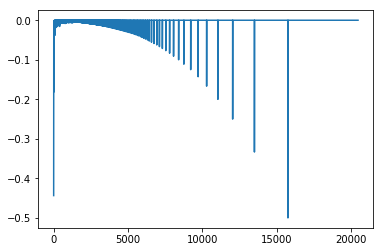

In [30]:
df_ndx_musc.n_dxs.pct_change().plot()

In [33]:
df_ndx_musc[df_ndx_musc.cfrac>0.8].head(3)

dx_code  n_dxs     csum      cperc     cfrac
1228  F02.81    312  1958199  80.004404  0.800044
1229   N84.0    312  1958511  80.017151  0.800172
1230   Q62.0    312  1958823  80.029899  0.800299

(0, 1.1)

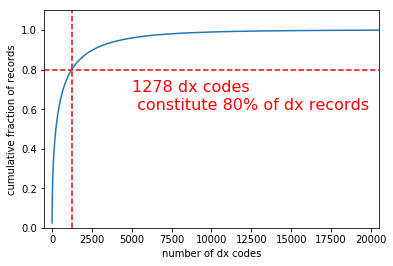

In [45]:
plt.plot(df_ndx_musc.cfrac)
plt.xlabel('number of dx codes')
plt.ylabel('cumulative fraction of records')
xrange = (-500, 20500) #plt.xlim()
plt.hlines(0.8, *xrange, 'r', 'dashed')
plt.vlines(1228, 0,1.1, 'r', 'dashed')
plt.xlim(xrange)
plt.text(5000, 0.6, '1278 dx codes \n constitute 80% of dx records', fontsize=16, color='r')
plt.ylim(0,1.1)

In [50]:
sql_dxs = '''
select visit_id, dx_sequence, dx_code
from cdw.diagnosis
where datasource_id = 25
  and last_update_date > sysdate-365
order by visit_id, dx_sequence
'''

In [51]:
df_dxs_musc = tabular.df_from_sql(sql_dxs, engine)

In [52]:
df_dxs_musc.to_csv('dxs_musc_2018.csv')

In [53]:
df_dxs_musc.head()

visit_id  dx_sequence   dx_code
0  163566342101            1  T14.90XA
1  163566342101            1  X58.XXXA
2  163566342101            2  S00.03XA
3  163574574601            1     241.0
4  163574574601            2    201.90